Ana Lyons  
101

# Homework 3: Arrays and Plotting

** Submit this notebook to bourses to receive a credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_HW03.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Sunspots

[Adapted from Newman, Exercise 3.1] At <a href="http://www-personal.umich.edu/~mejn/computational-physics/sunspots.txt">this link</a> you will find a file called `sunspots.txt`, which contains the observed number of sunspots on the Sun for each month since January 1749. The file contains two columns of numbers, the first being the month and the second being the sunspot number.

a. Write a program that reads in the data and makes a graph of sunspots as a function of time. Adjust the $x$ axis so that the data fills the whole horizontal width of the graph.

b. Modify you program to display two subplots in a single figure: The plot from Part 1 with all the data, and a second subplot with the first 1000 data points on the graph.

c. Write a function `running_average(y, r)` that takes an array or list $y$ and calculates the running average of the data, defined by 
$$ Y_k = \frac{1}{2r+1} \sum_{m=-r}^r y_{k+m},$$
where $y_k$ are the sunspot numbers in our case. Use this function and modify your second subplot (the one with the first 1000 data points) to plot both the original data and the running average on the same graph, again over the range covered by the first 1000 data points. Use $r=5$, but make sure your program allows the user to easily change $r$.

The next two parts may require you to google for how to do things. Make a strong effort to do these parts on your own without asking for help. If you do ask for help from a GSI or friend, first ask them to point you to the resource they used, and do your best to learn the necessary techniques from that resource yourself. Finding and learning from online documentation and forums is a very important skill. (Hint: Stack Exchange/Stack Overflow is often a great resource.)

d. Add legends to each of your subplots, but make them partially transparent, so that you can still see any data that they might overlap. *Note: In your program, you should only have to change $r$ for the running average in one place to adjust both the graph and the legend.*

e. Since the $x$ and $y$ axes in both subplots have the same units, add shared $x$ and $y$ labels to your plot that are centered on the horizontal and vertical dimensions of your figure, respectively. Also add a single title to your figure.

When your are finished, your plot should look something close to this:

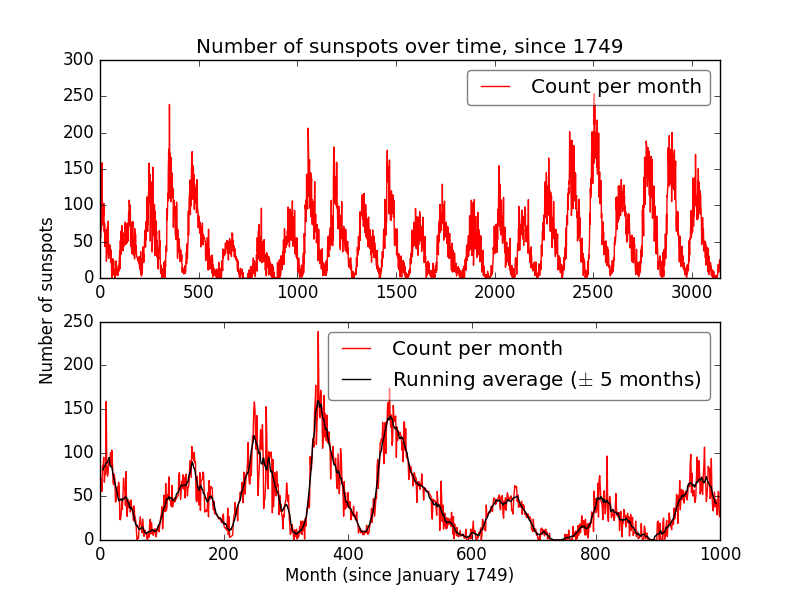

In [5]:
# Don't rerun this snippet of code.
# If you accidentally do, close and reopen the notebook (without saving)
# to get the image back. If all else fails, redownload the notebook.

# from IPython.display import Image
# Image(filename="samplecode/sunspots.png")

#### Hints

* The running average is not defined for the first and last few points that you're taking a running average over. (Why is that?) Notice, for instance, that the black curve in the plot above doesn't extend quite as far on either side as the red curve. For making your plot, it might be helpful if your `running_average` function returns an array of the $x$-values $x_k$ (or their corresponding indices $k$) along with an array of the $y$-values $Y_k$ that you compute for the running average.

* You can use the Latex code `$\pm$` for the $\pm$ symbol in the legend. You can also just write `+/-` if you prefer.


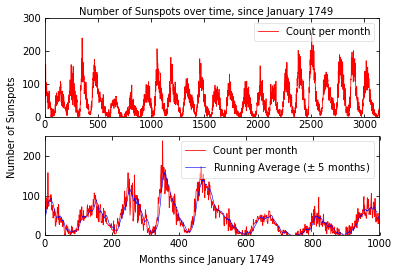

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def running_average(y, r):
    '''Takes an array or list y, and calculates the running average of the function.
    The running averages are output into an array with the same length as the input array.'''
    y_k_list = []
    for k in range(-r, len(y)-r):
        y_sum = 0
        for m in range(-r,r+1):
            y_sum += y[k+m]
        y_k = (1/(2*r+1))*y_sum
        y_k_list.append(y_k)
    return np.array(y_k_list)

month, sunspots = np.loadtxt('sunspots.txt', unpack = True)
r = 5 #sets the r parameter for the running average function

#plotting subplots, both running average and the data on the 2nd subplot
fig1, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(month, sunspots, '-r', label = 'Count per month', linewidth=0.8)
ax2.plot(month[0:999], sunspots[0:999], '-r', label= 'Count per month', linewidth=0.8)
ax2.plot(month[0:999], running_average(sunspots[0:999], r), '-b', label=('Running Average ($\pm$ {} months)').format(r), linewidth=0.6)

#adding shared labels to both subplots
fig1.text(0.5, 0.04, 'Months since January 1749', ha='center', va= 'center')
fig1.text(0.05, 0.5, 'Number of Sunspots', ha='center', va='center', rotation='vertical')
fig1.text(0.5, 0.9, 'Number of Sunspots over time, since January 1749', ha='center', va='center')

#subplot 1 axes adjustments
ax1.tick_params(which='both', direction='in', top=True, right=True)
ax1.set_xlim(month[0], month[-1])
ax1.set_ylim(0, 300)
ax1.legend(loc = 'upper right', fontsize='medium',framealpha=0.5)

#subplot 2 axes adjustments
ax2.tick_params(which='both', direction='in', top=True, right=True)
ax2.set_xlim(month[0], month[999])
ax2.set_ylim(0, 250)
ax2.legend(loc = 'upper right', fontsize='medium',framealpha=0.5)

plt.savefig('sunspots.png')


## Problem 2: Variety Plot

In this problem, you will reproduce the following as a single figure with four subplots, as best you can:

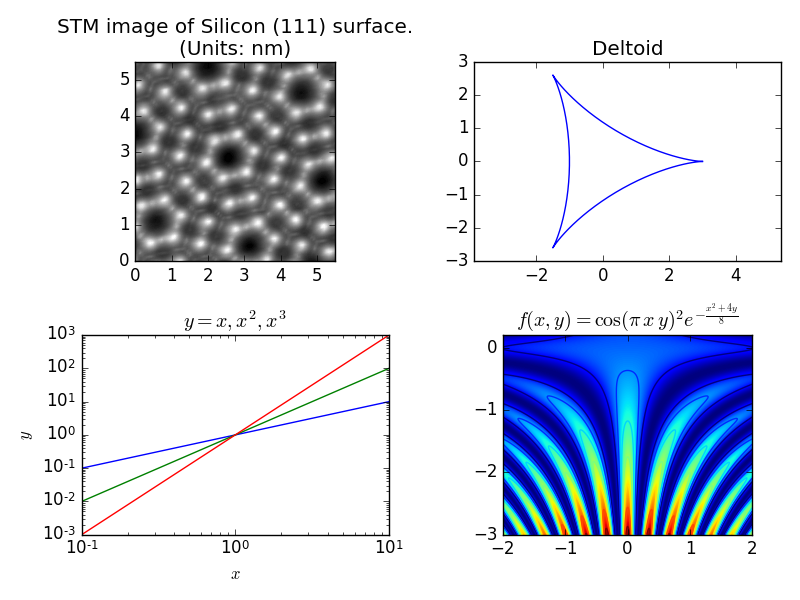

In [1]:
# Don't rerun this snippet of code.
# If you accidentally do, close and reopen the notebook (without saving)
# to get the image back. If all else fails, redownload the notebook.

# from IPython.display import Image
# Image(filename="samplecode/variety_plot.png")

Here are some hints and directions for each one:

**Upper-left:** This is an image of silicon taken with an electron microscope.

You can find the data file [here](http://www-personal.umich.edu/~mejn/computational-physics/stm.txt), among resources for the [Newman](http://www-personal.umich.edu/~mejn/computational-physics/) text.

You may assume that the upper-left of the array is indeed the upper-left of the image.

Both axes should run from 0 to 5.5.

This subplot uses the `gray` colormap.

**Upper-Right:** Matplotlib can plot any list of $(x,y)$ points you give it, including parametric or polar curves. The curve in this subplot is called a "deltoid", and is the result of the equations

$$ \begin{align*}
x &= 2\cos\theta + \cos2\theta \\
y &= 2\sin\theta - \sin2\theta
\end{align*} $$

over a range of $\theta$ from $0$ to $2\pi$.

To get the aspect ratio equal with nice spacing around the curve, try one of the following, depending on how you are making your subplots:
- if you're using `plt.subplot(...)` to get each subplot (the "state-machine" approach), add the `aspect='equal'` and `adjustable='datalim'` arguments to the deltoid subplot, so your command will look something like `plt.subplot(..., aspect='equal', adjustable='datalim')`.
- if you're using `... = plt.subplots(...)` (note the 's'!) or `ax = fig.add_subplot(...)` on a figure `fig` to get subplots with axes objects (the "object-oriented" approach), add the line `ax.set_aspect(aspect='equal', adjustable='datalim')`, where `ax` is the axes object you want to affect.

**Lower-Left:** This kind of plot is called a log-log plot, where both axes are on a logarithmic scale. Google or look in the matplotlib gallery to learn how to make this kind of plot.

The three curves are $y = x$, $y = x^2$, and $y = x^3$, where $x$ ranges over $10^{-1}$ to $10^1$. (Note: You can write powers of ten in python using the shorthand `1e-1` for $10^{-1}$, `1e1` for $10^1$, and so on.)

To make the pretty mathematical labels you see in the sample figure above, you can use
* `r'$y = x, x^2, x^3$'` for the title
* `r'$x$'` for the $x$-axis, and
* `r'$y$'` for the $y$-axis.

Just put these bits of code as you see them (with the **`r`** outside the quotes!) where you would normally put a string for the title or axes labels.

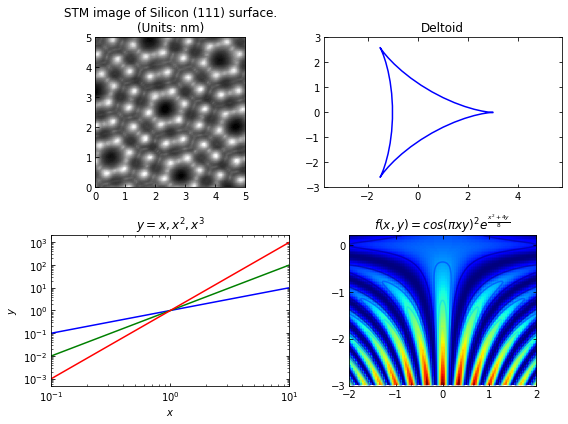

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
%matplotlib inline

plt.figure(1, figsize=(8, 6))

#silicon plot in the top left
plt.subplot(221)
stm = np.loadtxt('stm.txt')
plt.imshow(stm, extent=[0,5,0,5])
plt.set_cmap('gray')
plt.tick_params(direction='in', which='both')
plt.xticks(range(0,6))
plt.yticks(range(0,6))
plt.title('STM image of Silicon (111) surface.\n(Units: nm)')

#deltoid plot in the top right
plt.subplot(222, aspect='equal', adjustable='datalim')
theta = np.linspace(0, 2*np.pi, 50)
x = 2*np.cos(theta) + np.cos(2*theta)
y = 2*np.sin(theta) - np.sin(2*theta)
plt.plot(x,y, '-b')
plt.title('Deltoid')
plt.tick_params(direction='in', which='both', top=True, right=True)
plt.xticks([-2, 0, 2, 4])
plt.yticks([-3, -2, -1, 0, 1, 2, 3])

#log log plot in the bottom left
plt.subplot(223)
x1 = np.linspace(1e-1,1e1,100)
y1 = x1**2
y2 = x1**3
plt.plot(x1, x1, '-b')
plt.plot(x1, y1, '-g')
plt.plot(x1, y2, '-r')
plt.xscale('log')
plt.yscale('log')
plt.title(r'$y = x, x^2, x^3$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.tick_params(direction = 'in', which = 'both', top=True, right=True)
plt.xlim(0.1, 10)
plt.yticks([1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3])

#contour plot in the bottom right
plt.subplot(224)

X, Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-3,0.2, 100))
f = (np.cos(np.pi*X*Y)**2)*np.exp(-(X**2+4*Y)/8)
plt.imshow(f, origin='lower', extent=[-2,2,-3,0.2], cmap='jet')
plt.contour(f, alpha=0.5, extent=[-2,2,-3,0.2], cmap='jet')

plt.tick_params(direction = 'in', which= 'both', top=True, right=True)
plt.xticks([-2, -1, 0, 1, 2])
plt.yticks([-3, -2, -1, 0])
plt.title(r'$f(x,y)=cos({\pi}xy)^2e^\frac{{x^2}+4y}{8}$')

plt.tight_layout()
plt.savefig('variety_plot.png')


**Lower-Right:** Here you see a density plot with contours of the function

$$f(x,y) = \cos^2(\pi\,x\,y ) e^{-\frac{x^2 + 4 y}{8}},$$

over $x$ from -2 to 2 and $y$ from -3 to 0.2.

Use `meshgrid` to generate the $x$ and $y$ values. Be careful to make sure that the point $(-2,-3)$ is in the bottom left corner of the plot.

You'll need to use both `imshow` and `contour` to generate the density plot and then overlay it with contours. This plot uses the default contour spacing, so you don't need to worry about adjusting that. The colormap is `jet`, matplotlib's current default. (The default colormap will be changing to `viridis` in the next version.)

To get the ticks spaced out like you see here, use matplotlib's `xticks` or `set_xticks` functions for the $x$-axis (depending on how you're making your plots), and similar functions for the $y$-axis. You can pass each of these a single argument: a simple list or array of the numbers you want ticked on each axis.

**Spacing the subplots:** Once all is said and done and you run `plt.show()`, you may notice your plots are cramped and overlapping each other. Add the line `plt.tight_layout()` before `plt.show()`, and matplotlib will space things out in an attempt to avoid overlapping subplots.

## Problem 3: Wind Statistics

In this problem, you'll create a new array that summarizes a larger dataset. In the folder for this Homework assignment, you'll find a dataset "`wind.data`", and a description of the dataset "`wind.desc`". 

Read the description `wind.desc` to understand the format of `wind.data`. Then, write a program which loads the data and generates a new array with the following format: each row should contain the year, month, mean wind speed, min wind speed, and max wind speed, in that order. The means, mins, and maxes should be taken over all days in that particular month, over all the cities that `wind.data` includes. The rows should be in chronological order. Printing your array should give you something like this:

    [[ 61.           1.          11.38064516   0.5         27.71      ]
     [ 61.           2.          13.49235119   2.21        29.63      ]
     [ 61.           3.          11.07236559   1.46        23.45      ]
     ..., 
     [ 78.          10.           9.23389785   0.21        28.21      ]
     [ 78.          11.          12.72102778   0.96        30.21      ]
     [ 78.          12.          12.70357527   0.42        41.46      ]]

Next, plot the means, mins, and maxes over time using just a single `plt.plot()` command, along with whatever other commands you need to label and display the figure. (Hint: What happens when you plot a 2D array?) Be sure to label your figure with proper units, etc.

** Just for fun **

If you look at your plot, you'll notice some periodicity in the wind speeds. To better see the period, use the `running_average` function you wrote for the Sunspots problem to plot the running average of the means, mins, and maxes along with the original curves. Depending on how you wrote your `running_average` function, it may work immediately on this new 2D array without any modifications! From visual inspection of your running average, how long is the period, and when are wind speeds fastest and slowest in Ireland?

#### Hints

Depending on how you do this problem, you may find it useful to use boolean indexing along with numpy's `logical_and` function. It's okay to use lists as intermediate steps in generating your array. That is, not everything has to be an array, though it is possible to do this with only arrays. (Challenge!)



[[61.          1.         11.38064516  0.5        27.71      ]
 [61.          2.         13.49235119  2.21       29.63      ]
 [61.          3.         11.07236559  1.46       23.45      ]
 ...
 [78.         10.          9.23389785  0.21       28.21      ]
 [78.         11.         12.72102778  0.96       30.21      ]
 [78.         12.         12.70357527  0.42       41.46      ]]


(0, 45)

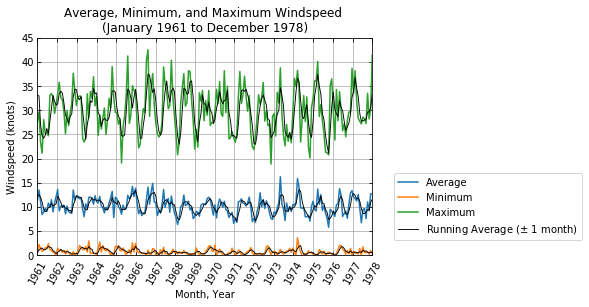

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wind_data = np.loadtxt('wind.data')


#makes a list containing the mean, min, and max wind speeds for each day over all speeds from all stations
new_data = []
for row in wind_data:
    row_mean = np.mean(row[3:15])
    row_min = np.min(row[3:15])
    row_max = np.max(row[3:15])
    new_row= [row[0], row[1], row[2]]+[row_mean, row_min, row_max]
    new_data.append(new_row)
    
#converts the list into an array
for row in new_data:
    row = np.array(row)
new_data_arr = np.array(new_data)
np.transpose(new_data_arr)

#finding the average, min, and max per month
final_data = []
for year in range(61,79):                          #checks each combination of year and month
    for month in range(1,13):
        mean_list = []
        min_list = []
        max_list = []
        for row in new_data_arr:                   #for each row, checks if its in the specific month and year
            if row[0] == year and row[1] == month: #if so, it adds the data for that day to lists of mean, min, and max
                mean_list.append(row[3])
                min_list.append(row[4])
                max_list.append(row[5])
        mean_month = np.mean(mean_list)            #at the end, it finds the mean, min, max for the month
        min_month = np.min(min_list)
        max_month = np.max(max_list)
        row_final = [year, month, mean_month, min_month, max_month] #adds those numbers to a list w/ the year and month
        final_data.append(row_final)                                #adds that list to a larger list containing mean, min, max for each month in each year

#converting the final_data list into a numpy array        
for data in final_data:
    data = np.array(data)
final_data_arr = np.array(final_data)

print(final_data_arr)

#plotting the final_data array
months_since = np.linspace(0, 216, 216)
plt.plot(months_since, final_data_arr[:, 2:5])
plt.plot(months_since, running_average(final_data_arr[:, 2:5], 1), '-k', linewidth=0.9)
plt.title('Average, Minimum, and Maximum Windspeed \n(January 1961 to December 1978)')
plt.xlabel('Month, Year')
plt.ylabel('Windspeed (knots)')
plt.legend(['Average','Minimum', 'Maximum', 'Running Average ($\pm$ 1 month)'], 
           loc='upper left', bbox_to_anchor=(1.05,0.4))
plt.tick_params(which='both', direction='in', right=True, top=True)
x_locs = np.linspace(0, 216, 18)
x_labels = list(range(1961,1979))
plt.xticks(x_locs, x_labels, rotation=60)
plt.grid(which='both', axis='both')
plt.xlim(0, 216)
plt.ylim(0, 45)
